In [2]:
# You can skip this if you already have TwinThread's python library installed
!pip install twinthread --upgrade

You should consider upgrading via the '/Users/brad/Documents/GitHub/Model-Pipeline/.venv/bin/python -m pip install --upgrade pip' command.


## Log into TwinThread

In [5]:
from twinthread import TwinThreadClient
from matplotlib import pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

client = TwinThreadClient()
client.login("brad.johnson@twinthread.com")

client.set_context({"taskId": 117418, "assetModelId": 7852})

data = client.get_input_data()

Password?········
Login succeeded


In [6]:
data

,Timestamp,Predict.Last,syntheticdata0Average.Average,syntheticdata0Hi.Average,syntheticdata0Lo.Average,syntheticdata0Slope.Average,syntheticdata0StDev.Average,syntheticdata1Average.Average,syntheticdata1Hi.Average,syntheticdata1Lo.Average,...,syntheticdata3Average.Average,syntheticdata3Hi.Average,syntheticdata3Lo.Average,syntheticdata3Slope.Average,syntheticdata3StDev.Average,syntheticdata4Hi.Average,syntheticdata4Lo.Average,syntheticdata4Slope.Average,syntheticdata4StDev.Average,segment
0,2021-01-26 16:22:38.000,968.7402,775.53687,775.71105,775.35209,0.02101,0.14432,72.85795,73.56336,72.12134,...,237.00447,238.69539,235.64616,0.22048,1.21002,969.0,967.96073,-0.01834,0.48526,default
1,2021-01-26 17:22:38.000,968.8128,775.59656,775.80117,775.37544,0.01031,0.16525,72.78808,73.32505,72.15773,...,236.89507,238.13152,235.60731,-0.16705,0.98868,969.0,968.22885,0.08685,0.36176,default
2,2021-01-26 18:22:38.000,969.0000,775.57150,775.82133,775.31079,0.04309,0.20714,72.85217,73.51040,72.24631,...,237.02369,238.25825,235.97920,0.16165,0.91060,969.0,968.10612,0.01886,0.43293,default
3,2021-01-26 19:22:38.000,968.8072,775.60380,775.87211,775.38416,0.00532,0.18800,72.76505,73.28231,71.93464,...,237.06993,238.29617,236.18250,0.03391,0.88612,969.0,968.18001,-0.02490,0.38516,default
4,2021-01-26 20:22:38.000,968.5319,775.58503,775.78772,775.38715,0.02601,0.16311,72.90828,73.53399,72.12032,...,236.97309,238.40038,235.85465,0.13338,1.03504,969.0,968.22935,0.01380,0.39335,default
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,2021-02-25 10:22:38.000,968.5495,773.96100,774.10800,773.65600,0.04309,0.17690,73.24491,73.86647,72.28388,...,236.84400,237.16650,236.63190,-0.02651,0.26371,969.0,967.76230,-0.24753,0.62188,default
715,2021-02-25 11:22:38.000,968.5495,773.96100,774.10800,773.65600,0.04309,0.17690,73.24491,73.86647,72.28388,...,236.84400,237.16650,236.63190,-0.02651,0.26371,969.0,967.76230,-0.24753,0.62188,default
716,2021-02-25 12:22:38.000,968.5495,773.96100,774.10800,773.65600,0.04309,0.17690,73.24491,73.86647,72.28388,...,236.84400,237.16650,236.63190,-0.02651,0.26371,969.0,967.76230,-0.24753,0.62188,default
717,2021-02-25 13:22:38.000,968.5495,773.96100,774.10800,773.65600,0.04309,0.17690,73.24491,73.86647,72.28388,...,236.84400,237.16650,236.63190,-0.02651,0.26371,969.0,967.76230,-0.24753,0.62188,default


<AxesSubplot:xlabel='syntheticdata0Average.Average', ylabel='syntheticdata0Hi.Average'>

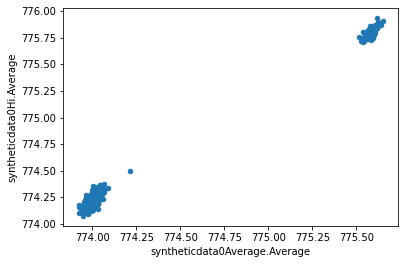

In [14]:
view = [data.columns[2], data.columns[3]]
data[view].plot(kind='scatter', x=view[0], y=view[1])

<AxesSubplot:>

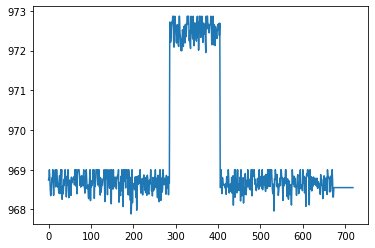

In [7]:
data['Predict.Last'].plot()

## Output a table into TwinThread

In [8]:
numerics = data.select_dtypes(exclude="O")
normalized = numerics / numerics.max()

client.save_table(normalized, "Normalized input")

{'assetModelId': '7852', 'taskId': '117418', 'name': '7852_117418_normalizedinput_org_i0', 'description': 'Normalized input', 'file': ('7852_117418_normalizedinput_org_i0', <_io.BufferedReader name="<class 'type'>_Normalized input">, 'text/csv')}
Saved table Normalized input


## Plotly

In [9]:
import plotly.express as px
fig = px.histogram(x = data[data.columns[2]])
fig.show()
client.save_plotly(fig, data.columns[2] + " Histogram")

{'assetModelId': '7852', 'taskId': '117418', 'name': '7852_117418_syntheticdata0averageaveragehistogram_org_i0.json', 'description': 'syntheticdata0Average.Average Histogram', 'file': ('7852_117418_syntheticdata0averageaveragehistogram_org_i0.json', <_io.BufferedReader name="<class 'type'>_syntheticdata0Average.Average Histogram">, 'text/csv')}
Saved plotly syntheticdata0Average.Average Histogram


## Matplotlib
 This also works with seaborn and other image-based visualization libraries

{'assetModelId': '7852', 'taskId': '117418', 'name': '7852_117418_syntheticdata0averageaveragetrend_org_i0.png', 'description': 'syntheticdata0Average.Average Trend', 'file': ('7852_117418_syntheticdata0averageaveragetrend_org_i0.png', <_io.BufferedReader name="<class 'type'>_syntheticdata0Average.Average Trend">, 'text/csv')}
Saved image syntheticdata0Average.Average Trend


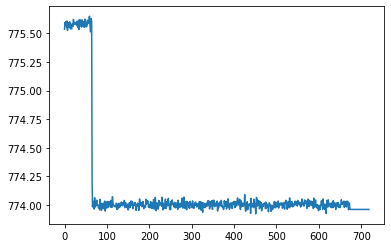

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt = data[data.columns[2]].plot()

client.save_image(fig, data.columns[2] + " Trend")

## Write this cell's python code into the Model Factory task

In [11]:
%%upload_task PP-Engine-Testing_7852_13774_117418

data = client.get_input_data()

numerics = data.select_dtypes(exclude="O")
normalized = numerics / numerics.max()

client.save_table(numerics.head(20), "input")


Save this cell to TwinThread?(Y/n)y
Test before uploading?(Y/n)n
Cell contents uploaded to TwinThread task


In [12]:
%%upload_task PP-Engine-Testing_7852_13774_117418

fig = plt.figure()

plt = data[data.columns[2]].plot()

client.save_image(fig, data.columns[2] + " Trend")

Save this cell to TwinThread?(Y/n)y
Test before uploading?(Y/n)n
Cell contents uploaded to TwinThread task


# Visit your model

After you've run the cells above you'll have new visualizations available on your model. [Visit your model](https://dev.twinthread.com/models/7852/workflow?operationName=Train) and click on the User Defined Task block to see them.